In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Create the connection object   
myconn = mysql.connector.connect(host = "localhost", user = "root",passwd = "",database = "emotibot")  
  
#creating the cursor object
cur = myconn.cursor()

In [6]:
df = pd.read_sql('SELECT * FROM logs', con=myconn)

In [7]:
df

,logID,Emotion,Accuracy,TimeStamp
0,202,Fearful,89.9,Thu May 7 12:01:08 2020
1,203,Neutral,89.9,Thu May 7 12:01:08 2020
2,204,Fearful,89.9,Thu May 7 12:01:09 2020
3,205,Surprised,89.9,Thu May 7 12:01:09 2020
4,206,Neutral,89.9,Thu May 7 12:39:13 2020
...,...,...,...,...
432,634,Fearful,89.9,Sat May 9 15:53:14 2020
433,635,Fearful,89.9,Sat May 16 12:35:49 2020
434,636,Neutral,89.9,Sat May 16 12:35:49 2020
435,637,Fearful,89.9,Sat May 16 12:35:49 2020


In [14]:
df.describe()

,logID,Accuracy
count,437.000000,437.0
mean,420.000000,89.9
std,126.295289,0.0
min,202.000000,89.9
25%,311.000000,89.9
50%,420.000000,89.9
75%,529.000000,89.9
max,638.000000,89.9


In [18]:
df['Emotion'].unique()

array(['Fearful', 'Neutral', 'Surprised', 'Happy', 'Sad', 'Angry'],
      dtype=object)

In [19]:
data = df.copy()

In [20]:
data['Emotion'] = data['Emotion'].map({'Fearful':0, 'Neutral':1, 'Surprised':2, 'Happy':3, 'Sad':4, 'Angry':5})

In [21]:
data

,logID,Emotion,Accuracy,TimeStamp
0,202,0,89.9,Thu May 7 12:01:08 2020
1,203,1,89.9,Thu May 7 12:01:08 2020
2,204,0,89.9,Thu May 7 12:01:09 2020
3,205,2,89.9,Thu May 7 12:01:09 2020
4,206,1,89.9,Thu May 7 12:39:13 2020
...,...,...,...,...
432,634,0,89.9,Sat May 9 15:53:14 2020
433,635,0,89.9,Sat May 16 12:35:49 2020
434,636,1,89.9,Sat May 16 12:35:49 2020
435,637,0,89.9,Sat May 16 12:35:49 2020


In [48]:
perc = df['Emotion'].value_counts(normalize=True) * 100

In [49]:
perc

Fearful      37.070938
Surprised    29.977117
Neutral      26.544622
Happy         3.432494
Sad           1.601831
Angry         1.372998
Name: Emotion, dtype: float64

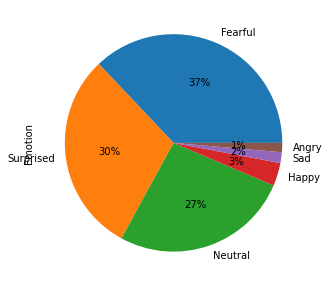

In [53]:
plot = perc.plot.pie(subplots=True, figsize=(5, 5),autopct='%1.0f%%')